## Dowolna sieć DBN w klasyfikacji, regresji, inżynierii cech:

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 2.8108 - accuracy: 0.3810 - val_loss: 0.9548 - val_accuracy: 0.6661
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 1.0245 - accuracy: 0.6831 - val_loss: 0.5377 - val_accuracy: 0.8662
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.7119 - accuracy: 0.7894 - val_loss: 0.4264 - val_accuracy: 0.8956
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5454 - accuracy: 0.8424 - val_loss: 0.3448 - val_accuracy: 0.9120
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4575 - accuracy: 0.8712 - val_loss: 0.2394 - val_accuracy: 0.9368
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3982 - accuracy: 0.8888 - val_loss: 0.2422 - val_accuracy: 0.9373
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3550 - accuracy: 0.8989 - val_loss: 0.2285 - val_accuracy:

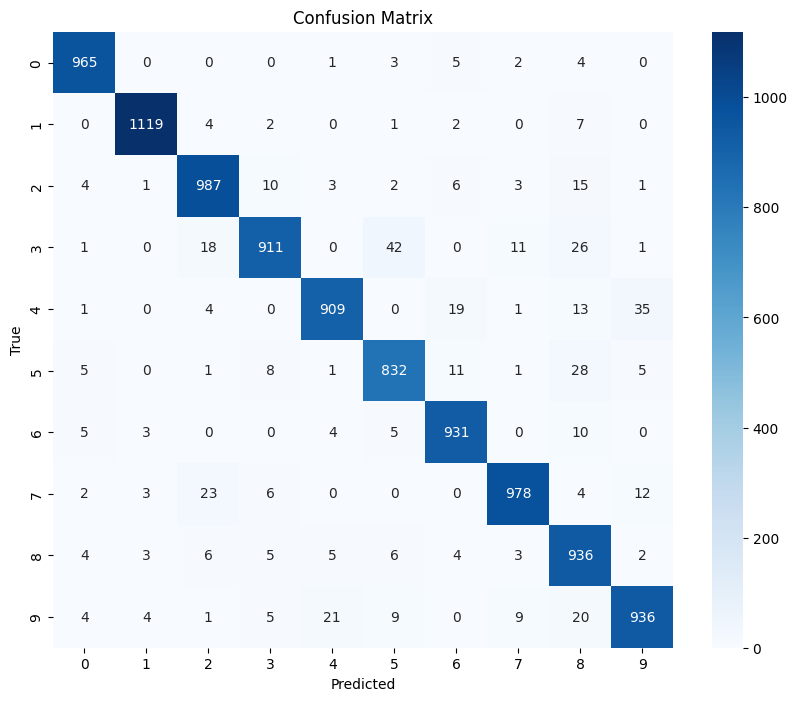

In [10]:
## A - Klasyfikacja
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Activation
from tensorflow.keras.optimizers import Adam
import tensorflow.keras.utils as np_utils

input_dim = 784
num_classes = 10
# Load minst dataset, split it into train and test sets
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# Reshape the input data
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

# Convert target labels to one-hot encoded format
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

# Initialize the DBN model
model = Sequential()

# Add the first hidden layer (input layer)
model.add(Dense(units=64, input_dim=input_dim))
model.add(Activation('relu'))
model.add(Dropout(0.2))

# Add additional hidden layers
model.add(Dense(units=32))
model.add(Activation('relu'))
model.add(Dropout(0.2))

# Add the output layer
model.add(Dense(units=num_classes))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Plot the confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# Get the predicted labels for the test set
y_pred = np.argmax(model.predict(X_test), axis=1)

# Compute the confusion matrix
cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(num_classes), yticklabels=range(num_classes))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Epoch 1/25
938/938 [==============================] - 2s 2ms/step - loss: 3.6590 - val_loss: 1.4213
Epoch 2/25
938/938 [==============================] - 1s 2ms/step - loss: 1.9957 - val_loss: 0.9693
Epoch 3/25
938/938 [==============================] - 1s 2ms/step - loss: 1.6644 - val_loss: 0.8922
Epoch 4/25
938/938 [==============================] - 1s 2ms/step - loss: 1.4942 - val_loss: 0.8241
Epoch 5/25
938/938 [==============================] - 1s 2ms/step - loss: 1.3635 - val_loss: 0.7651
Epoch 6/25
938/938 [==============================] - 1s 2ms/step - loss: 1.2581 - val_loss: 0.7732
Epoch 7/25
938/938 [==============================] - 1s 2ms/step - loss: 1.1936 - val_loss: 0.6582
Epoch 8/25
938/938 [==============================] - 1s 2ms/step - loss: 1.1220 - val_loss: 0.6730
Epoch 9/25
938/938 [==============================] - 1s 2ms/step - loss: 1.0403 - val_loss: 0.6895
Epoch 10/25
938/938 [==============================] - 1s 2ms/step - loss: 1.0084 - val_loss: 0.6777

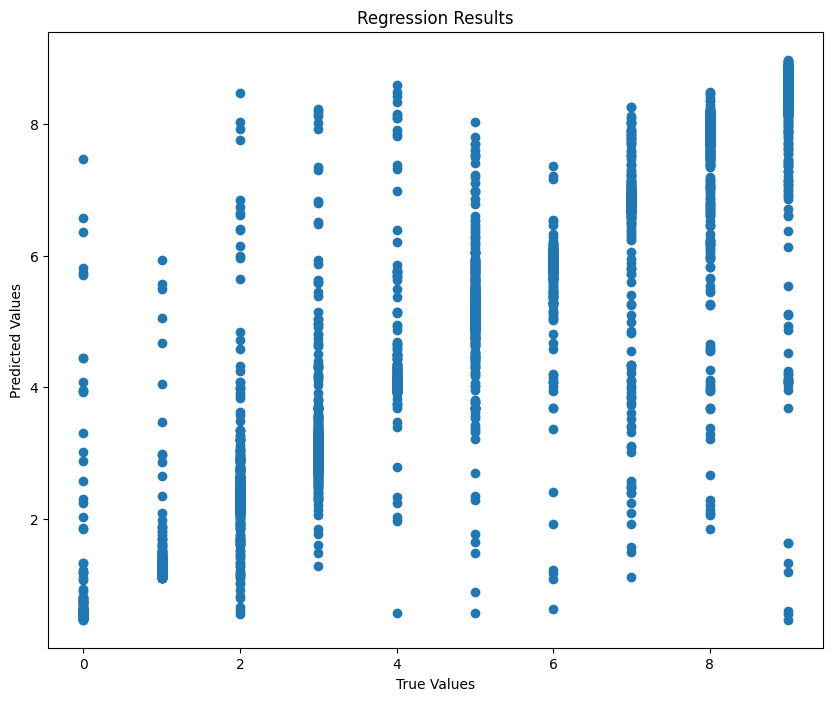

In [15]:
## A - Regression
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Activation
from tensorflow.keras.optimizers import Adam

input_dim = 784
# Load minst dataset, split it into train and test sets
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# Reshape the input data
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

# Normalize the input data
X_train = X_train / 255.0
X_test = X_test / 255.0

# Initialize the DBN model
model = Sequential()

# Add the first hidden layer (input layer)
model.add(Dense(units=64, input_dim=input_dim))
model.add(Activation('relu'))
model.add(Dropout(0.2))

# Add additional hidden layers
model.add(Dense(units=32))
model.add(Activation('relu'))
model.add(Dropout(0.2))

# Add additional hidden layers
model.add(Dense(units=64))
model.add(Activation('relu'))
model.add(Dropout(0.25))
# Add additional hidden layers
model.add(Dense(units=32))
model.add(Activation('relu'))
model.add(Dropout(0.3))

# Add the output layer
model.add(Dense(units=1))

# Compile the model with mean squared error loss
model.compile(loss='mean_squared_error', optimizer=Adam())

model.fit(X_train, y_train, epochs=25, batch_size=64, validation_data=(X_test, y_test))

loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")

# Make predictions on the test set
y_pred = model.predict(X_test)

# Perform any necessary post-processing or analysis on the predicted values
# ...

# Plot the predicted values against the true values
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Regression Results')
plt.show()

In [19]:
## A - Feature Engineering
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Activation
from tensorflow.keras.optimizers import Adam

input_dim = 784
num_classes = 10

# Load minst dataset, split it into train and test sets
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Reshape the input data
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

# Normalize the input data
X_train = X_train / 255.0
X_test = X_test / 255.0

# Convert the target labels to categorical format
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# Initialize the model
model = Sequential()

# Add the first hidden layer (input layer)
model.add(Dense(units=64, input_dim=input_dim))
model.add(Activation('relu'))
model.add(Dropout(0.2))

# Add additional hidden layers
model.add(Dense(units=32))
model.add(Activation('relu'))
model.add(Dropout(0.2))

# Add additional hidden layers
model.add(Dense(units=64))
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Add additional hidden layers
model.add(Dense(units=32))
model.add(Activation('relu'))
model.add(Dropout(0.3))

# Add the output layer
model.add(Dense(units=num_classes))
model.add(Activation('softmax'))

# Compile the model with appropriate loss function and metrics
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=25, batch_size=64, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Make predictions on the test set
y_pred = model.predict(X_test)
import shap

# Calculate SHAP values
explainer = shap.Explainer(model)
shap_values = explainer.shap_values(X_test)

# Create a summary plot
shap.summary_plot(shap_values, X_test, feature_names=range(input_dim), plot_type='bar')


Epoch 1/25
938/938 [==============================] - 2s 2ms/step - loss: 0.7436 - accuracy: 0.7653 - val_loss: 0.2170 - val_accuracy: 0.9373
Epoch 2/25
938/938 [==============================] - 1s 2ms/step - loss: 0.3384 - accuracy: 0.9105 - val_loss: 0.1749 - val_accuracy: 0.9516
Epoch 3/25
938/938 [==============================] - 1s 2ms/step - loss: 0.2803 - accuracy: 0.9280 - val_loss: 0.1459 - val_accuracy: 0.9600
Epoch 4/25
938/938 [==============================] - 1s 2ms/step - loss: 0.2463 - accuracy: 0.9364 - val_loss: 0.1373 - val_accuracy: 0.9612
Epoch 5/25
938/938 [==============================] - 1s 2ms/step - loss: 0.2243 - accuracy: 0.9427 - val_loss: 0.1312 - val_accuracy: 0.9638
Epoch 6/25
938/938 [==============================] - 1s 2ms/step - loss: 0.2117 - accuracy: 0.9466 - val_loss: 0.1234 - val_accuracy: 0.9664
Epoch 7/25
938/938 [==============================] - 1s 2ms/step - loss: 0.1971 - accuracy: 0.9511 - val_loss: 0.1276 - val_accuracy: 0.9661
Epoch 

ValueError: masker cannot be None.

In [21]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Define the number of timesteps and features
timesteps = 10
features = 5

# Define the number of hidden units in the RNN layer
hidden_units = 32

# Initialize the model
model = Sequential()

# Add the RNN layer with Vanilla RNN type
model.add(SimpleRNN(hidden_units, input_shape=(timesteps, features)))

# Add a fully connected layer
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Print the model summary
model.summary()



# Evaluate the model on the test dataset
loss = model.evaluate(X_test, y_test)

# Print the loss (or any other evaluation metric)
print("Test Loss:", loss)

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 32)                1216      
                                                                 
 dense_67 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1249 (4.88 KB)
Trainable params: 1249 (4.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


ValueError: in user code:

    File "c:\Users\ZULUL\Desktop\ML\.venv\lib\site-packages\keras\src\engine\training.py", line 2042, in test_function  *
        return step_function(self, iterator)
    File "c:\Users\ZULUL\Desktop\ML\.venv\lib\site-packages\keras\src\engine\training.py", line 2025, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\ZULUL\Desktop\ML\.venv\lib\site-packages\keras\src\engine\training.py", line 2013, in run_step  **
        outputs = model.test_step(data)
    File "c:\Users\ZULUL\Desktop\ML\.venv\lib\site-packages\keras\src\engine\training.py", line 1893, in test_step
        y_pred = self(x, training=False)
    File "c:\Users\ZULUL\Desktop\ML\.venv\lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\ZULUL\Desktop\ML\.venv\lib\site-packages\keras\src\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_20" is incompatible with the layer: expected shape=(None, 10, 5), found shape=(None, 784)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Define the number of timesteps and features
timesteps = 10
features = 5

# Define the number of hidden units in the RNN cell
hidden_units = 32

# Initialize the model
model = Sequential()

# Add the RNN cell with Vanilla RNN type
model.add(SimpleRNN(hidden_units, return_sequences=True, input_shape=(timesteps, features)))

# Add another RNN cell
model.add(SimpleRNN(hidden_units))

# Add a fully connected layer
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Print the model summary
model.summary()